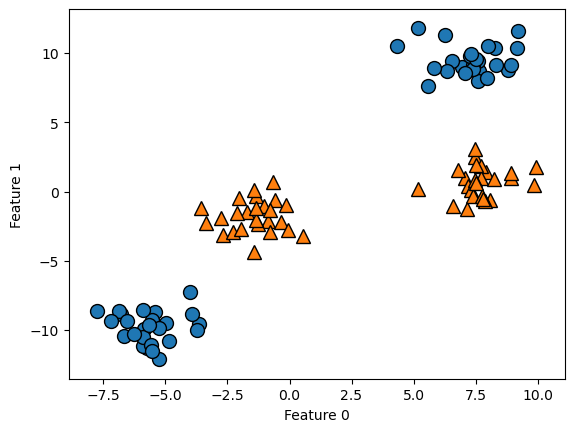

In [8]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.show()

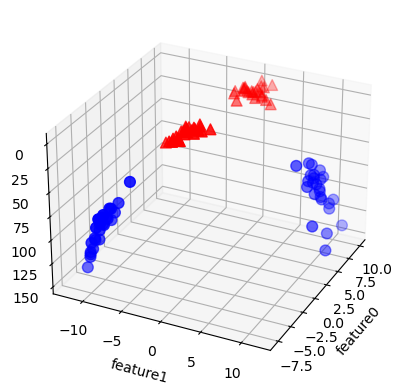

In [9]:
X_new = np.hstack([X, X[:, 1:] ** 2])

figure = plt.figure()

# visualize in 3D
ax=figure.add_subplot(111,projection='3d', elev=-152, azim=-26)

# plot first all the points with y == 0, then all with y == 1
mask = y == 0

ax.scatter(X_new[mask, 0],X_new[mask, 1],X_new[mask, 2],c='b',s=60)
ax.scatter(X_new[~mask, 0],X_new[~mask, 1],X_new[~mask, 2],c='r',marker='^',s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

plt.show()

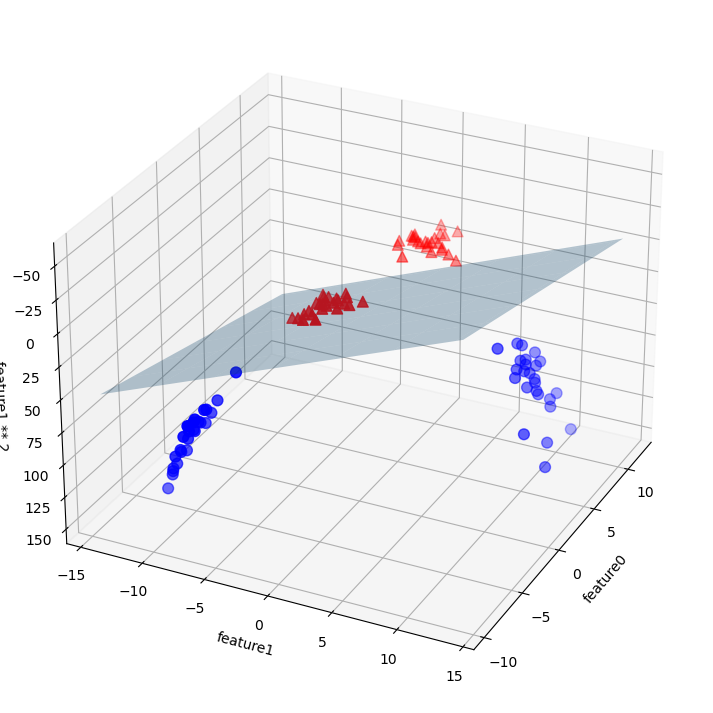

In [10]:
linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure(figsize=(16,9))
ax= figure.add_subplot(111,projection='3d', elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)

ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

mask = y == 0

ax.scatter(X_new[mask, 0],X_new[mask, 1],X_new[mask, 2],c='b',s=60)
ax.scatter(X_new[~mask, 0],X_new[~mask, 1],X_new[~mask, 2],c='r',marker='^',s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")
plt.show()



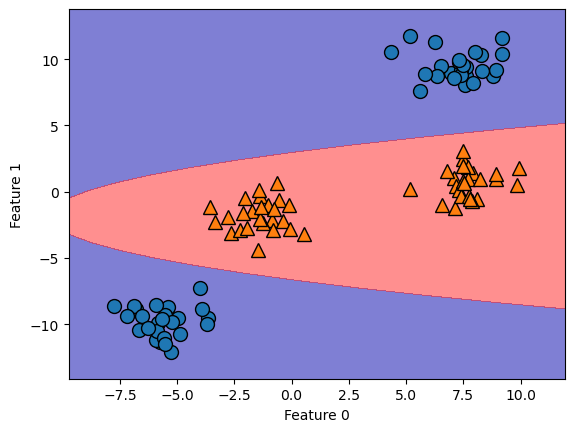

In [11]:

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()
